In [1]:
import sys
sys.path.append(r"stylegan2-ada-pytorch")
import pickle
import torch

# check if cuda is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

with open('weights/styleGAN-snapshot.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].to(device)  # torch.nn.Module

In [2]:
import torch.nn.functional as F
import torchvision.transforms as transforms
import numpy as np

def generate_fake(labels, seed=0):
    size_batch = len(labels)
    z= torch.from_numpy(np.random.RandomState(seed).randn(size_batch, G.z_dim)).to(device)

    label_hot = F.one_hot(labels , num_classes=2 ).to(device)
    img = G(z, label_hot, truncation_psi=0.6 ) 
    
    return img

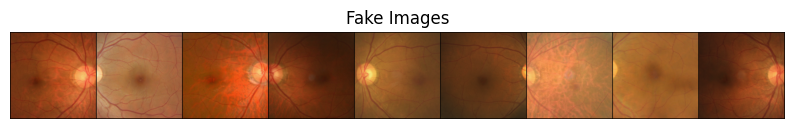

In [3]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

def show_images(imgs, labels, title=None):
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.title(title)
    plt.imshow(np.transpose(vutils.make_grid(imgs, nrow=10, padding=2, normalize=True).cpu(),(1,2,0)))
    plt.show()

# generate 64 fake images
labels = torch.randint(2, (9,)).to(device)
imgs = generate_fake(labels, seed=0 )
show_images(imgs, labels, title='Fake Images')